# Causal Analysis


***
***

In [ ]:
import warnings

import sys,os
import numpy as np
import pandas as pd

: 

In [1]:
import seaborn as sns

In [8]:
import matplotlib.pyplot as plt

In [9]:
from causalnex.discretiser import Discretiser
from causalnex.structure import DAGRegressor
from causalnex.inference import InferenceEngine
from causalnex.network import BayesianNetwork
from causalnex.network.sklearn import BayesianNetworkClassifier
from causalnex.structure.notears import from_pandas
#from causalnex.utils.network_utils import get_markov_blanket
from causalnex.structure.notears import from_pandas, from_pandas_lasso
from causalnex.discretiser.discretiser_strategy import ( DecisionTreeSupervisedDiscretiserMethod )

In [10]:
sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)

In [11]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
sys.path.append(os.path.abspath(os.path.join('../data')))

In [12]:
#import local packages
from data_preview import DataPreview 
from data_loader import *
from data_cleaner import CleanDf
from ScalerNormalizer import ScalerNormalizer
import plots as plot

In [13]:
#object creation
scalar = ScalerNormalizer()
#data_df=DataPreview(df)
#CleanDf(df)

In [24]:
#df_new=load_df_from_csv("../data/data.csv")
df=pd.read_csv("../data/clean_data.csv")

In [25]:
#df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,0.24,0.08,1.09,0.91,8.59,153.40,0.01,0.05,0.05,0.02,0.03,0.01,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12
1,842517,M,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,0.06,0.54,0.73,3.40,74.08,0.01,0.01,0.02,0.01,0.01,0.00,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09
2,84300903,M,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,0.06,0.75,0.79,4.58,94.03,0.01,0.04,0.04,0.02,0.02,0.00,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09
3,84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,0.10,0.50,1.16,3.44,27.23,0.01,0.07,0.06,0.02,0.06,0.01,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17
4,84358402,M,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,0.06,0.76,0.78,5.44,94.44,0.01,0.02,0.06,0.02,0.02,0.01,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08


In [14]:
df=load_df_from_csv("../data/data.csv")

Succesfull!:
	 Succesfully read .csv file


In [15]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,0.24,0.08,1.10,0.91,8.59,153.40,0.01,0.05,0.05,0.02,0.03,0.01,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12,nan
1,842517,M,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,0.06,0.54,0.73,3.40,74.08,0.01,0.01,0.02,0.01,0.01,0.00,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09,nan
2,84300903,M,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,0.06,0.75,0.79,4.59,94.03,0.01,0.04,0.04,0.02,0.02,0.00,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09,nan
3,84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,0.10,0.50,1.16,3.44,27.23,0.01,0.07,0.06,0.02,0.06,0.01,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,nan
4,84358402,M,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,0.06,0.76,0.78,5.44,94.44,0.01,0.02,0.06,0.02,0.02,0.01,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08,nan


In [16]:
feat = ['diagnosis', 'perimeter_worst', 'area_worst', 'radius_worst', 'concave points_worst', 'concave points_mean', 'perimeter_mean', 'area_mean', 'radius_mean', 'area_se', 'concavity_mean', 'concavity_worst', 'perimeter_se', 'radius_se', 'compactness_worst', 'compactness_mean', 'texture_worst', 'concave points_se', 'smoothness_worst', 'texture_mean', 'symmetry_worst', 'concavity_se', 'smoothness_mean', 'symmetry_mean', 'compactness_se', 'fractal_dimension_worst', 'fractal_dimension_se', 'texture_se', 'fractal_dimension_mean', 'symmetry_se', 'smoothness_se']

In [17]:
x = df[feat[:29]]
x['diagnosis'] = x['diagnosis'].apply(lambda x: 1 if x == "M" else 0)
x.head(5)

,diagnosis,perimeter_worst,area_worst,radius_worst,concave points_worst,concave points_mean,perimeter_mean,area_mean,radius_mean,area_se,concavity_mean,concavity_worst,perimeter_se,radius_se,compactness_worst,compactness_mean,texture_worst,concave points_se,smoothness_worst,texture_mean,symmetry_worst,concavity_se,smoothness_mean,symmetry_mean,compactness_se,fractal_dimension_worst,fractal_dimension_se,texture_se,fractal_dimension_mean
0,1,184.60,2019.00,25.38,0.27,0.15,122.80,1001.00,17.99,153.40,0.30,0.71,8.59,1.10,0.67,0.28,17.33,0.02,0.16,10.38,0.46,0.05,0.12,0.24,0.05,0.12,0.01,0.91,0.08
1,1,158.80,1956.00,24.99,0.19,0.07,132.90,1326.00,20.57,74.08,0.09,0.24,3.40,0.54,0.19,0.08,23.41,0.01,0.12,17.77,0.28,0.02,0.08,0.18,0.01,0.09,0.00,0.73,0.06
2,1,152.50,1709.00,23.57,0.24,0.13,130.00,1203.00,19.69,94.03,0.20,0.45,4.59,0.75,0.42,0.16,25.53,0.02,0.14,21.25,0.36,0.04,0.11,0.21,0.04,0.09,0.00,0.79,0.06
3,1,98.87,567.70,14.91,0.26,0.11,77.58,386.10,11.42,27.23,0.24,0.69,3.44,0.50,0.87,0.28,26.50,0.02,0.21,20.38,0.66,0.06,0.14,0.26,0.07,0.17,0.01,1.16,0.10
4,1,152.20,1575.00,22.54,0.16,0.10,135.10,1297.00,20.29,94.44,0.20,0.40,5.44,0.76,0.20,0.13,16.67,0.02,0.14,14.34,0.24,0.06,0.10,0.18,0.02,0.08,0.01,0.78,0.06


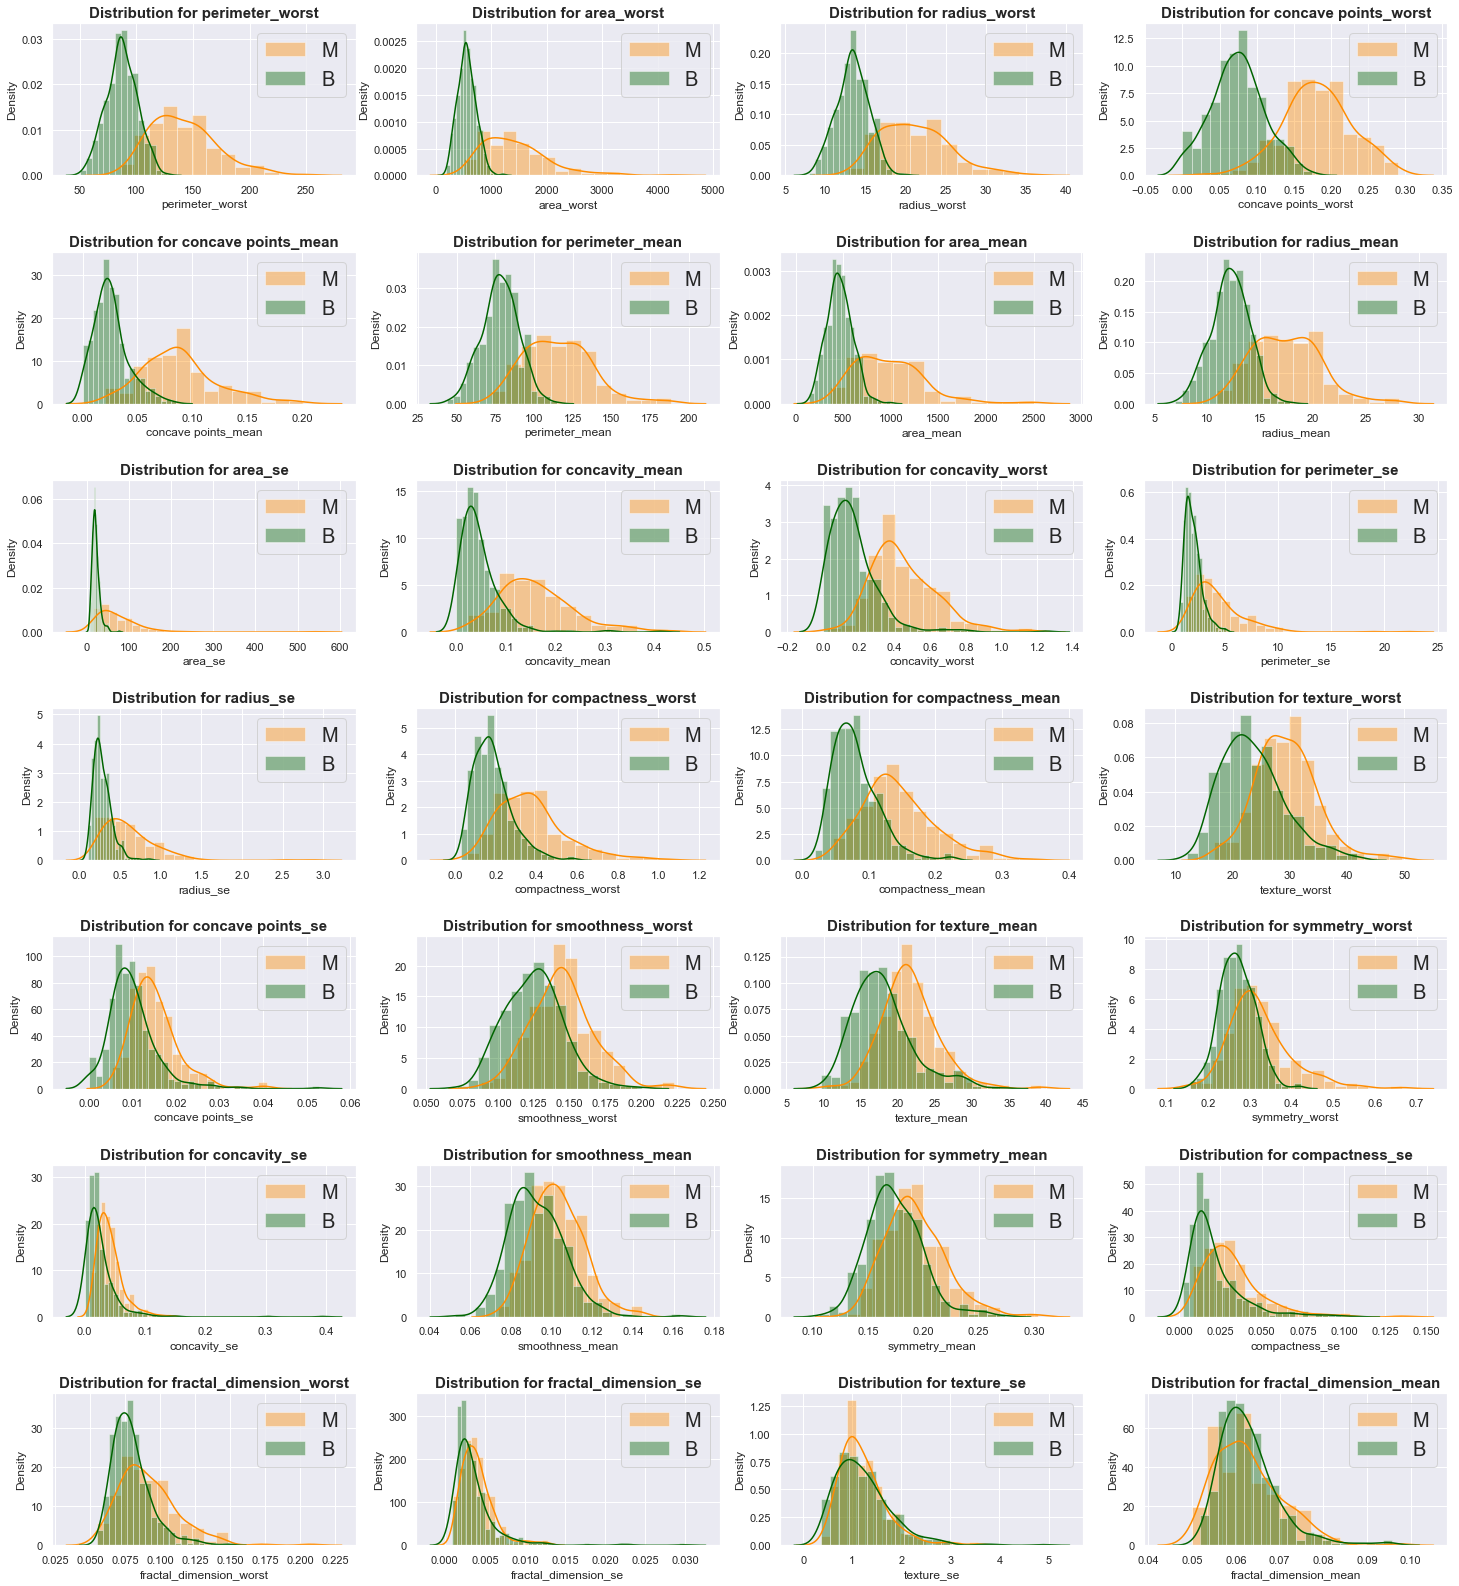

In [18]:
num_feat = x.shape[1]-1
fig = plt.figure(figsize=(25, num_feat))
fig.subplots_adjust(hspace=.5)
axs = [fig.add_subplot(num_feat / 4, 4, i + 1) for i in range(num_feat)]

for i, column in enumerate(x.columns[1:]):
    sns.distplot(x[x.diagnosis == 1][column], ax=axs[i], color='darkorange', label="M")
    sns.distplot(x[x.diagnosis == 0][column], ax=axs[i], color='darkgreen', label="B")
    axs[i].set_title('Distribution for {}'.format( column), fontweight='bold', fontsize=15)
    axs[i].legend(fontsize=20)
plt.show()

In [19]:
features = x.iloc[:, 1:]
features

,perimeter_worst,area_worst,radius_worst,concave points_worst,concave points_mean,perimeter_mean,area_mean,radius_mean,area_se,concavity_mean,concavity_worst,perimeter_se,radius_se,compactness_worst,compactness_mean,texture_worst,concave points_se,smoothness_worst,texture_mean,symmetry_worst,concavity_se,smoothness_mean,symmetry_mean,compactness_se,fractal_dimension_worst,fractal_dimension_se,texture_se,fractal_dimension_mean
0,184.60,2019.00,25.38,0.27,0.15,122.80,1001.00,17.99,153.40,0.30,0.71,8.59,1.10,0.67,0.28,17.33,0.02,0.16,10.38,0.46,0.05,0.12,0.24,0.05,0.12,0.01,0.91,0.08
1,158.80,1956.00,24.99,0.19,0.07,132.90,1326.00,20.57,74.08,0.09,0.24,3.40,0.54,0.19,0.08,23.41,0.01,0.12,17.77,0.28,0.02,0.08,0.18,0.01,0.09,0.00,0.73,0.06
2,152.50,1709.00,23.57,0.24,0.13,130.00,1203.00,19.69,94.03,0.20,0.45,4.59,0.75,0.42,0.16,25.53,0.02,0.14,21.25,0.36,0.04,0.11,0.21,0.04,0.09,0.00,0.79,0.06
3,98.87,567.70,14.91,0.26,0.11,77.58,386.10,11.42,27.23,0.24,0.69,3.44,0.50,0.87,0.28,26.50,0.02,0.21,20.38,0.66,0.06,0.14,0.26,0.07,0.17,0.01,1.16,0.10
4,152.20,1575.00,22.54,0.16,0.10,135.10,1297.00,20.29,94.44,0.20,0.40,5.44,0.76,0.20,0.13,16.67,0.02,0.14,14.34,0.24,0.06,0.10,0.18,0.02,0.08,0.01,0.78,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,166.10,2027.00,25.45,0.22,0.14,142.00,1479.00,21.56,158.70,0.24,0.41,7.67,1.18,0.21,0.12,26.40,0.02,0.14,22.39,0.21,0.05,0.11,0.17,0.03,0.07,0.00,1.26,0.06
565,155.00,1731.00,23.69,0.16,0.10,131.20,1261.00,20.13,99.04,0.14,0.32,5.20,0.77,0.19,0.10,38.25,0.02,0.12,28.25,0.26,0.04,0.10,0.18,0.02,0.07,0.00,2.46,0.06
566,126.70,1124.00,18.98,0.14,0.05,108.30,858.10,16.60,48.55,0.09,0.34,3.42,0.46,0.31,0.10,34.12,0.02,0.11,28.08,0.22,0.05,0.08,0.16,0.04,0.08,0.00,1.08,0.06
567,184.60,1821.00,25.74,0.26,0.15,140.10,1265.00,20.60,86.22,0.35,0.94,5.77,0.73,0.87,0.28,39.42,0.02,0.17,29.33,0.41,0.07,0.12,0.24,0.06,0.12,0.01,1.60,0.07


In [20]:
normal_data = scalar.scale_and_normalize(features, features.columns.to_list())
normal_data.insert(loc=0, column='diagnosis', value=x['diagnosis'])
normal_data

,diagnosis,perimeter_worst,area_worst,radius_worst,concave points_worst,concave points_mean,perimeter_mean,area_mean,radius_mean,area_se,concavity_mean,concavity_worst,perimeter_se,radius_se,compactness_worst,compactness_mean,texture_worst,concave points_se,smoothness_worst,texture_mean,symmetry_worst,concavity_se,smoothness_mean,symmetry_mean,compactness_se,fractal_dimension_worst,fractal_dimension_se,texture_se,fractal_dimension_mean
0,1,0.24,0.16,0.22,0.33,0.26,0.20,0.13,0.19,0.10,0.25,0.21,0.13,0.13,0.22,0.29,0.05,0.11,0.22,0.01,0.22,0.05,0.21,0.25,0.13,0.15,0.07,0.04,0.22
1,1,0.30,0.24,0.33,0.35,0.19,0.34,0.27,0.35,0.07,0.11,0.11,0.07,0.09,0.08,0.10,0.17,0.14,0.19,0.15,0.13,0.03,0.16,0.21,0.04,0.12,0.05,0.05,0.08
2,1,0.23,0.17,0.25,0.37,0.28,0.26,0.20,0.27,0.07,0.21,0.16,0.08,0.10,0.17,0.19,0.16,0.17,0.21,0.17,0.18,0.04,0.23,0.23,0.13,0.09,0.06,0.04,0.09
3,1,0.08,0.03,0.08,0.30,0.18,0.08,0.03,0.07,0.01,0.19,0.18,0.04,0.05,0.27,0.27,0.13,0.12,0.31,0.12,0.34,0.05,0.27,0.26,0.18,0.26,0.10,0.06,0.34
4,1,0.26,0.18,0.27,0.29,0.27,0.33,0.25,0.33,0.09,0.24,0.17,0.11,0.12,0.09,0.18,0.06,0.19,0.23,0.08,0.08,0.07,0.22,0.20,0.09,0.07,0.08,0.05,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,0.25,0.19,0.27,0.33,0.30,0.29,0.24,0.30,0.12,0.25,0.14,0.14,0.17,0.08,0.13,0.16,0.20,0.20,0.18,0.04,0.06,0.23,0.14,0.09,0.05,0.05,0.08,0.06
565,1,0.25,0.18,0.27,0.27,0.23,0.29,0.23,0.30,0.08,0.16,0.12,0.10,0.11,0.08,0.12,0.34,0.15,0.14,0.30,0.10,0.05,0.20,0.17,0.08,0.04,0.03,0.22,0.05
566,1,0.23,0.14,0.24,0.30,0.16,0.27,0.18,0.28,0.05,0.13,0.17,0.08,0.08,0.17,0.16,0.36,0.18,0.17,0.38,0.08,0.07,0.18,0.16,0.16,0.09,0.06,0.10,0.08
567,1,0.22,0.13,0.21,0.30,0.25,0.22,0.16,0.21,0.05,0.27,0.24,0.08,0.07,0.27,0.26,0.24,0.10,0.20,0.22,0.16,0.06,0.19,0.22,0.15,0.15,0.06,0.09,0.14


In [21]:
%%time
sm = from_pandas(normal_data.iloc[:, :9], tabu_parent_nodes=['diagnosis'],)

Wall time: 20.2 s


In [22]:
import plots as vs
import graphviz